<a href="https://colab.research.google.com/github/saikale/GramworkX/blob/main/GramworkX_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

 **Importing/Sourcing Expenses Dataset**

In [108]:
#importing necessary libraries for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [109]:
#Reading dataset
df=pd.read_csv("/content/Expenses - Sheet1.csv")

#Display/Print the data
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.550
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.834
1336,21,female,25.800,0,no,southwest,2007.945


In [110]:
#Printing head of dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


In [111]:
#checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [112]:
#Checking datatype
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [113]:
# Creating the dictionary to map and change the strings to numerics
map={"female":0,"male":1}
map1={"yes":1,"no":0}
#Using the map function
df["sex"]=df["sex"].map(map)
df["smoker"]=df["smoker"].map(map1)

In [114]:
#Printing code to see changes
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.920
1,18,1,33.770,1,0,southeast,1725.552
2,28,1,33.000,3,0,southeast,4449.462
3,33,1,22.705,0,0,northwest,21984.470
4,32,1,28.880,0,0,northwest,3866.855
5,31,0,25.740,0,0,southeast,3756.622
6,46,0,33.440,1,0,southeast,8240.590
7,37,0,27.740,3,0,northwest,7281.506
8,37,1,29.830,2,0,northeast,6406.411
9,60,0,25.840,0,0,northwest,28923.140


**OneHotEncoding**

In [115]:
#Changing categorical features into a matrix dataframe and storing into temp variable
temp=pd.get_dummies(df["region"])
temp.head(10)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [116]:
# Dropping the region column
df.drop("region",axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.920
1,18,1,33.770,1,0,1725.552
2,28,1,33.000,3,0,4449.462
3,33,1,22.705,0,0,21984.470
4,32,1,28.880,0,0,3866.855


In [117]:
#Combining both data frames
df=pd.concat([df,temp],axis=1)
df.head(10)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.920,0,0,0,1
1,18,1,33.770,1,0,1725.552,0,0,1,0
2,28,1,33.000,3,0,4449.462,0,0,1,0
3,33,1,22.705,0,0,21984.470,0,1,0,0
4,32,1,28.880,0,0,3866.855,0,1,0,0
5,31,0,25.740,0,0,3756.622,0,0,1,0
6,46,0,33.440,1,0,8240.590,0,0,1,0
7,37,0,27.740,3,0,7281.506,0,1,0,0
8,37,1,29.830,2,0,6406.411,1,0,0,0
9,60,0,25.840,0,0,28923.140,0,1,0,0


In [118]:
#Storing dependent variable into Y and all other independent features into X
Y=df['charges']
X=df.drop("charges",axis=1)

In [119]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [120]:
Y

0       16884.920
1        1725.552
2        4449.462
3       21984.470
4        3866.855
          ...    
1333    10600.550
1334     2205.981
1335     1629.834
1336     2007.945
1337    29141.360
Name: charges, Length: 1338, dtype: float64

# **ML** **MODEL**

**Train** **Test** **Split**

In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.15)

In [122]:
#Finding correlation
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


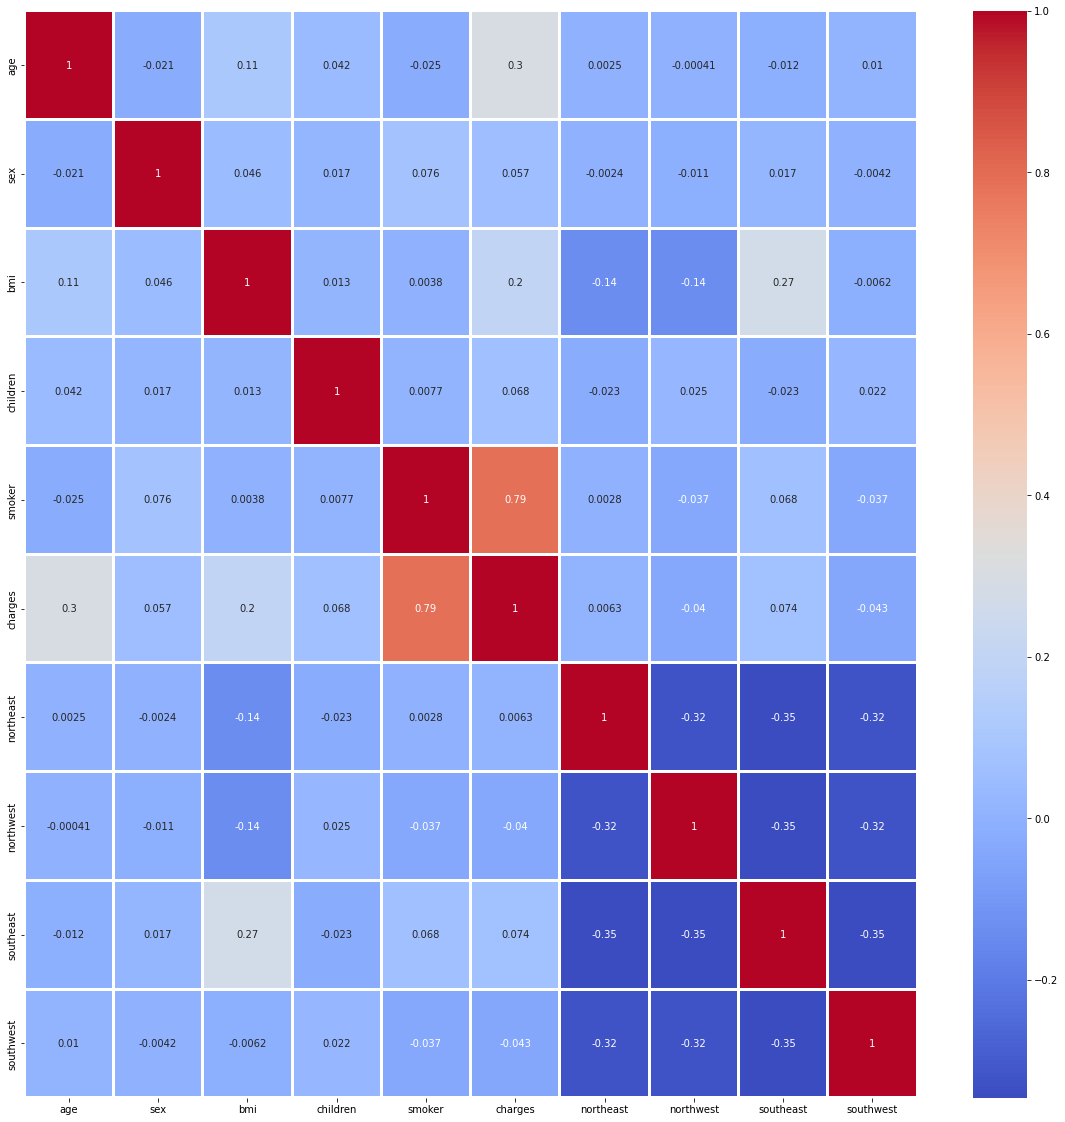

In [123]:
# Plotting the correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linewidths=2)

Text(0, 0.5, 'Charges')

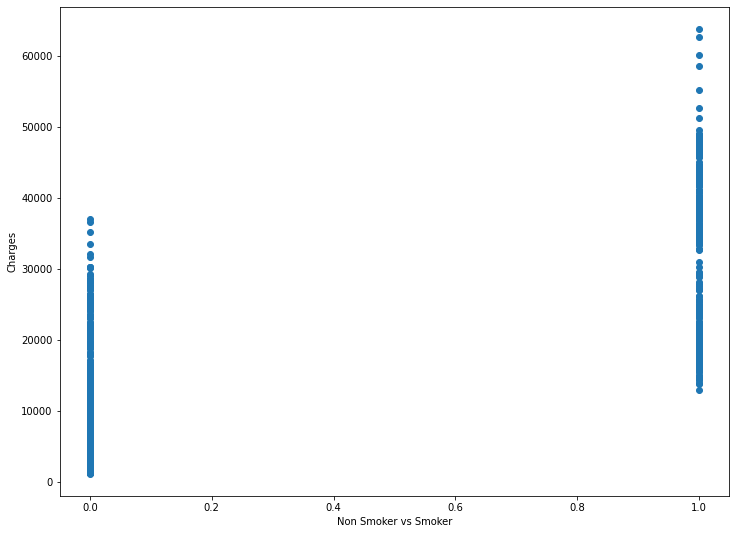

In [124]:
#Plotting Charges based on smoker
plt.figure(figsize=(12,9))
plt.scatter(df["smoker"],Y)
plt.xlabel("Non Smoker vs Smoker")
plt.ylabel("Charges")

**Training** **model**

# **Linear Regression**

In [125]:
from sklearn.linear_model import LinearRegression
#Creating an object of linear regression class
reg=LinearRegression()
#Training the model
reg.fit(x_train,y_train)
#predicting test data
y_pred=reg.predict(x_test)

**Accuracy**

In [126]:
from sklearn.metrics import r2_score
#Calculating the R^2 
r2_score(y_test,y_pred)

0.7918340200728949

# **Polynomail Regression**

In [127]:
#Storing X into temporary variable PX
PX=X

In [128]:
from sklearn.preprocessing import PolynomialFeatures
#Changing features to polynomial to use polynomial regression
pol=PolynomialFeatures(degree=3)
PX=pol.fit_transform(X)
PX


array([[ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 18.,  1., ...,  0.,  0.,  0.],
       [ 1., 28.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  0.],
       [ 1., 21.,  0., ...,  0.,  0.,  1.],
       [ 1., 61.,  0., ...,  0.,  0.,  0.]])

In [129]:
#Splitting the data into train and test samples
x_train,x_test,y_train,y_test=train_test_split(PX,Y,random_state=0,test_size=0.15)

In [130]:
# Applying Regression, Predicting test data and finding the r^2
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.8715194618279625

In [131]:
from sklearn.model_selection import cross_val_score
#Cross validation list of 4 folds
c=cross_val_score(reg,PX,Y,cv=4)
c

array([0.84846303, 0.79022142, 0.85205272, 0.81596222])

In [132]:
c.mean()

0.8266748439933868

**Accuracy**

In [133]:
print("Mean accuracy after cross validation is:",c.mean()*100,end="%")

Mean accuracy after cross validation is: 82.66748439933868%

**Accuracy using Polynomial Regression is greater than using Linear Model.**